### Importing required libraries

In [1]:
import pandas as pd
import sqlite3 as sql

### Connecting to the Database
* Connecting to the SQLite Database can be established using the connect() method, passing the name of the database to be accessed as a parameter.

In [2]:
connection = sql.connect('factbook.db')

In [3]:
connection

### Defining a function to read queries

In [4]:
def read(query):
    return pd.read_sql_query(query, connection)

### The Schema Table

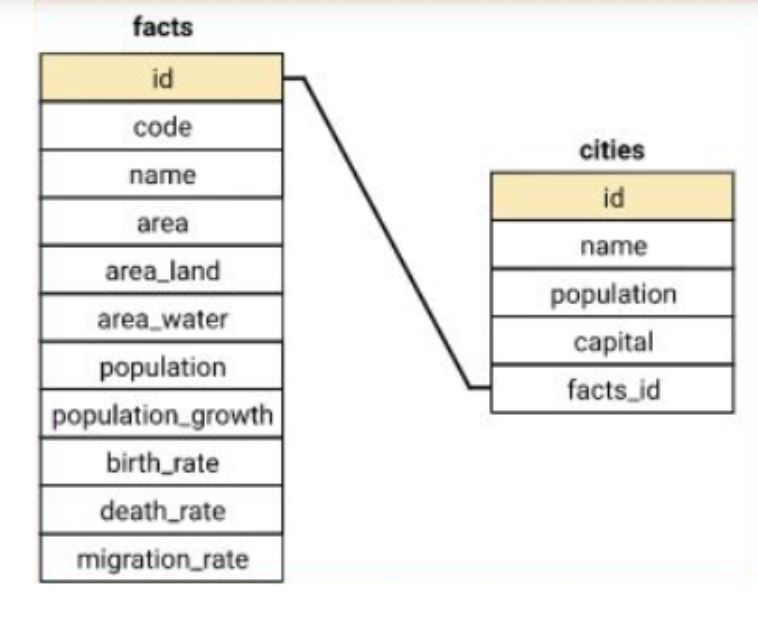

In [5]:
read("""
    SELECT * FROM SQLITE_MASTER
""")

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,cities,cities,4,CREATE TABLE cities (\n id integer prim...


In [6]:
read("""
    SELECT * FROM facts
""").head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [7]:
read("""
    SELECT * FROM cities
""").head()

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


### Join Clause
* A JOIN clause combines the records from two tables on the basis of common attributes. 
* The different types of joins are as follows:
    * INNER JOIN (OR JOIN) – Gives the records that have common attributes in both tables.
    * LEFT JOIN – Gives all records from the left table and only the common records from the right table.
    * RIGHT JOIN – Gives all records from the right table and only the common records from the left table.
    * FULL OUTER JOIN – Gives all records when there is a common attribute in either the left or the right table.
    * CROSS JOIN – Gives records of one table with all other records of another table.

In [8]:
read("""
    SELECT 
    
    facts.id,
    cities.facts_id,
    
    facts.name AS Country, 
    cities.name AS Country,
    
    facts.population AS Country_pop,
    cities.population AS City_pop
    
    FROM facts
    
    INNER JOIN cities
    ON facts.id == cities.facts_id
""")

,id,facts_id,Country,Country,Country_pop,City_pop
0,216,216,Aruba,Oranjestad,112162,37000
1,6,6,Antigua and Barbuda,Saint John'S,92436,27000
2,184,184,United Arab Emirates,Abu Dhabi,5779760,942000
3,184,184,United Arab Emirates,Dubai,5779760,1978000
4,184,184,United Arab Emirates,Sharjah,5779760,983000
...,...,...,...,...,...,...
392,167,167,Swaziland,Mbabane,1435613,66000
393,193,193,Yemen,Sanaa,26737317,2419000
394,193,193,Yemen,Aden,26737317,784000
395,194,194,Zambia,Lusaka,15066266,1802000


In [9]:
read( """
    SELECT 
    
    facts.name AS Country, cities.name AS City
    
    FROM facts
    
    LEFT JOIN cities
    ON
    facts.id == cities.facts_id
""")

,Country,City
0,Afghanistan,Kabul
1,Albania,Tirana
2,Algeria,Algiers
3,Algeria,Oran
4,Andorra,Andorra La Vella
...,...,...
443,Atlantic Ocean,None
444,Indian Ocean,None
445,Pacific Ocean,None
446,Southern Ocean,None


In [10]:
read("""
    SELECT 
    facts.name AS Country, cities.name AS City
    FROM facts
    
    LEFT JOIN cities
    ON
    facts.id == cities.facts_id
    WHERE City is null
""")

,Country,City
0,Kosovo,None
1,Monaco,None
2,Nauru,None
3,San Marino,None
4,Singapore,None
5,Holy See (Vatican City),None
6,Taiwan,None
7,European Union,None
8,Ashmore and Cartier Islands,None
9,Christmas Island,None


In [11]:
read("""
    SELECT 
    facts.name AS Country, 
    facts.population AS Country_pop, 
    cities.population AS City_pop,
    cities.population/CAST(facts.population as float) AS Pop
    FROM facts
    INNER JOIN cities
    ON
    facts.id == cities.facts_id
    GROUP BY facts.name 
""")

,Country,Country_pop,City_pop,Pop
0,Afghanistan,32564342,3097000,0.095104
1,Albania,3029278,419000,0.138317
2,Algeria,39542166,2916000,0.073744
3,American Samoa,54343,64000,1.177705
4,Andorra,85580,23000,0.268754
...,...,...,...,...
205,Wallis and Futuna,15613,1000,0.064049
206,Western Sahara,570866,237000,0.415159
207,Yemen,26737317,2419000,0.090473
208,Zambia,15066266,1802000,0.119605


In [12]:
read( """
    SELECT 
    facts_id,
    sum(population) AS urban_pop 
    FROM cities
    GROUP BY facts_id
""")

,facts_id,urban_pop
0,1,3097000
1,10,172000
2,100,1127000
3,101,5000
4,102,546000
...,...,...
205,95,810000
206,96,701000
207,97,2022000
208,98,239000


### Subquery
* A subquery is a SQL query nested inside a larger query

In [13]:
read("""
    SELECT 
    f.name Country, f.population Country_pop ,
    a.urban_pop, a.urban_pop/CAST(f.population as float) Pepcentage
    from facts as f
    inner join (SELECT facts_id,  sum(population) urban_pop from cities group by facts_id) as a
    on f.id == a.facts_id
    Group by f.name 
""")

,Country,Country_pop,urban_pop,Pepcentage
0,Afghanistan,32564342,3097000,0.095104
1,Albania,3029278,419000,0.138317
2,Algeria,39542166,3699000,0.093546
3,American Samoa,54343,64000,1.177705
4,Andorra,85580,23000,0.268754
...,...,...,...,...
205,Wallis and Futuna,15613,1000,0.064049
206,Western Sahara,570866,237000,0.415159
207,Yemen,26737317,3203000,0.119795
208,Zambia,15066266,1802000,0.119605
